# `regression.GLMNetCVRegressor`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import slickml

print(f"Loaded SlickML Version = {slickml.__version__}")

Loaded SlickML Version = 0.2.0b0


In [24]:
from slickml.regression import GLMNetCVRegressor

help(GLMNetCVRegressor)

Help on class GLMNetCVRegressor in module slickml.regression._glmnet:

class GLMNetCVRegressor(sklearn.base.BaseEstimator, sklearn.base.RegressorMixin)
 |  GLMNetCVRegressor(alpha: Optional[float] = 0.5, n_lambda: Optional[int] = 100, n_splits: Optional[int] = 3, metric: Optional[str] = 'r2', scale: Optional[bool] = True, sparse_matrix: Optional[bool] = False, fit_intercept: Optional[bool] = True, cut_point: Optional[float] = 1.0, min_lambda_ratio: Optional[float] = 0.0001, tolerance: Optional[float] = 1e-07, max_iter: Optional[int] = 100000, random_state: Optional[int] = 1367, lambda_path: Union[List[float], numpy.ndarray, pandas.core.series.Series, NoneType] = None, max_features: Optional[int] = None) -> None
 |  
 |  GLMNetCVRegressor.
 |  
 |  This is wrapper using GLM-Net [1]_ to train a Regularized Linear Model via ElasticNet regression and
 |  find the optimal penalty values through N-Folds cross validation. In principle, GLMNet (also known
 |  as ElasticNet) can also be used fo

### Example 1: `GLMNetCVRegressor` model for `california-housing` data set

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    shuffle=True,
)

In [5]:
X_train.shape

(14448, 8)

In [6]:
reg = GLMNetCVRegressor(
    alpha=0.01,
    n_splits=4,
    metric="r2",
)
reg.fit(X_train, y_train)

In [7]:
# pred targets (or reg.y_pred_)
y_pred = reg.predict(X_test)
y_pred[:10]

array([1.51808965, 0.97204683, 1.12910763, 2.89206911, 0.7444938 ,
       2.3516389 , 2.37461795, 1.93055604, 2.54091302, 0.69552612])

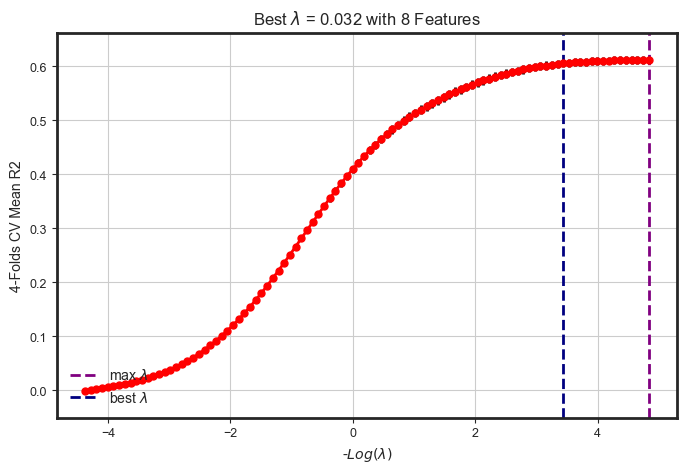

In [8]:
# plot cv_results
reg.plot_cv_results(legendloc=3)

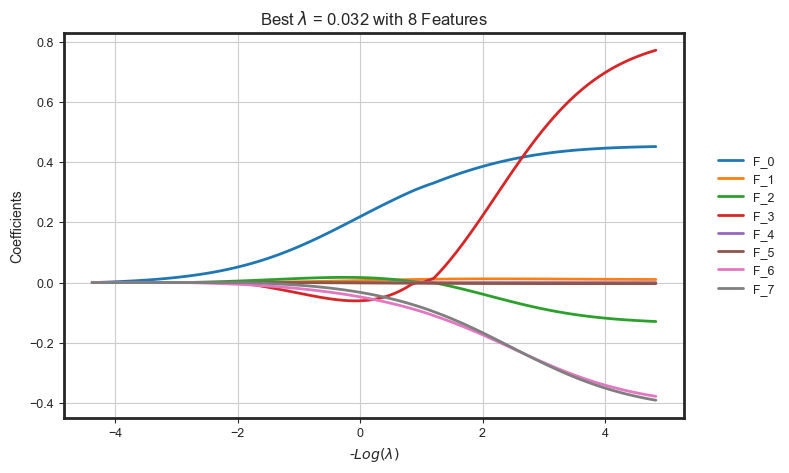

In [9]:
# plot coeff_paths
reg.plot_coeff_path()

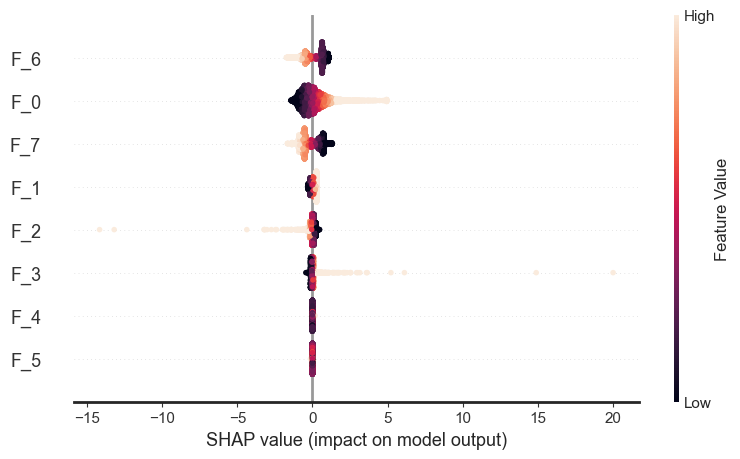

In [10]:
reg.plot_shap_summary()

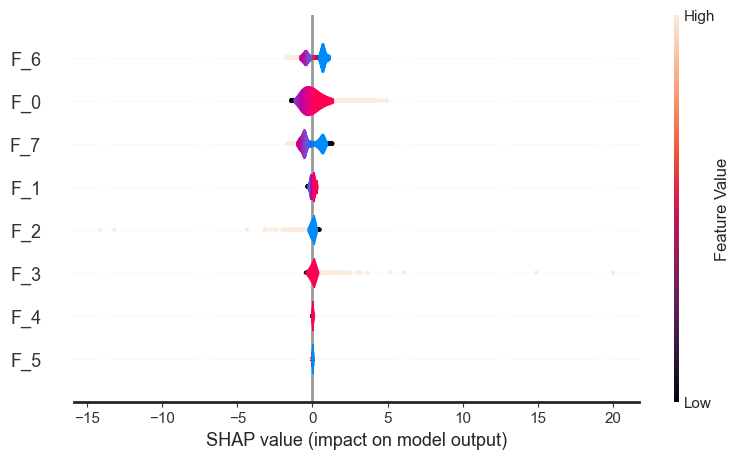

In [11]:
# shap summary plot violin on test data
reg.plot_shap_summary(plot_type="violin", validation=True)

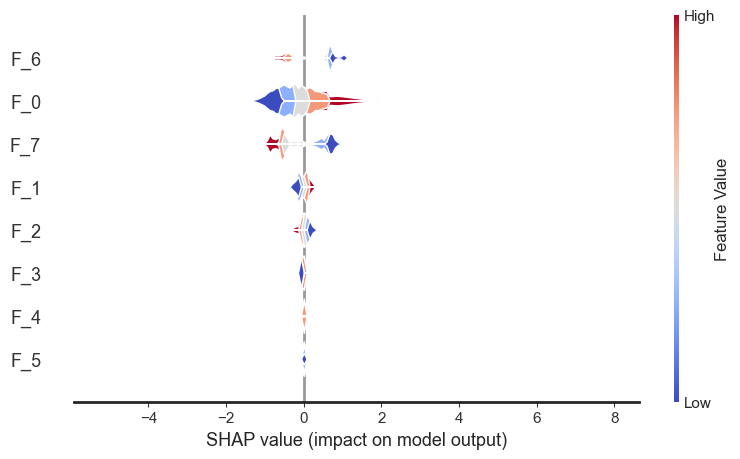

In [12]:
# shap summary plot layered violin plot on train data
reg.plot_shap_summary(
    plot_type="layered_violin",
    validation=False,
    layered_violin_max_num_bins=5,
)

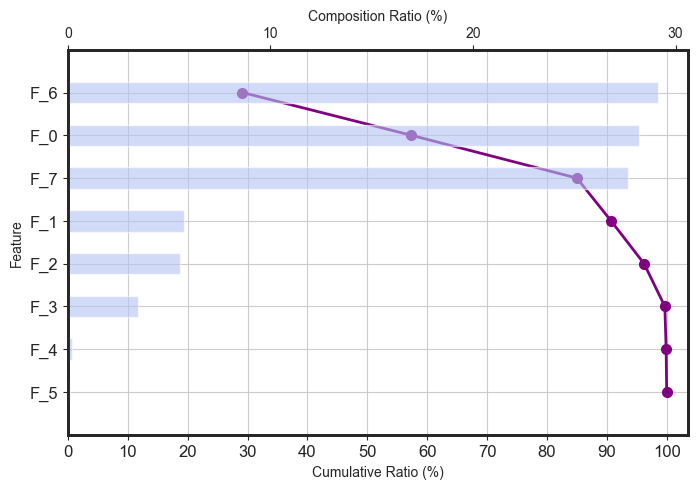

In [13]:
# shap waterfall plot
reg.plot_shap_waterfall()

In [14]:
# non-zero coeffs (or reg.get_coeffs())
reg.coeff_

,feature,coeff
0,F_3,0.607118
1,F_0,0.438376
2,F_1,0.011502
3,F_4,0.000007
4,F_5,-0.003394
5,F_2,-0.103816
6,F_6,-0.302137
7,F_7,-0.308244


In [15]:
# intercept (or reg.get_intercept())
reg.intercept_

-26.144759661874776

In [16]:
# model cv_results_ (or reg.get_cv_results())
reg.cv_results_

,F_0_coeff_path,F_1_coeff_path,F_2_coeff_path,F_3_coeff_path,F_4_coeff_path,F_5_coeff_path,F_6_coeff_path,F_7_coeff_path,intercept_path,lambda_path,cv_standard_error,cv_mean_score
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.074377,79.673786,0.000307,0.000307
1,0.000589,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.072091,72.595786,0.000309,0.000309
2,0.001234,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.069589,66.146576,0.000288,0.000288
3,0.001940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.066852,60.270297,0.000266,0.000266
4,0.002711,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.063860,54.916050,0.000245,0.000245
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.450044,0.010617,-0.125296,0.745148,0.000003,-0.003407,-0.363741,-0.375411,-32.030499,0.011559,0.007232,0.007232
96,0.450565,0.010557,-0.126415,0.752717,0.000003,-0.003405,-0.367643,-0.379646,-32.400067,0.010532,0.007223,0.007223
97,0.451022,0.010500,-0.127426,0.759627,0.000003,-0.003404,-0.371310,-0.383622,-32.746702,0.009597,0.007215,0.007215
98,0.451447,0.010449,-0.128354,0.765946,0.000003,-0.003403,-0.374610,-0.387210,-33.059879,0.008744,0.007207,0.007207


In [17]:
# total model results json (or reg.get_results())
reg.results_.keys()

dict_keys(['coeff', 'coeff_path', 'cv_standard_error', 'cv_mean_score', 'lambda_path', 'lambda_best', 'lambda_max', 'n_lambda', 'intercept', 'intercept_path', 'params', 'module'])

In [18]:
# model's fitting params (or reg.get_params())
reg.params_

{'alpha': 0.01,
 'cut_point': 1.0,
 'fit_intercept': True,
 'lambda_path': None,
 'lower_limits': -inf,
 'max_features': None,
 'max_iter': 100000,
 'min_lambda_ratio': 0.0001,
 'n_jobs': -1,
 'n_lambda': 100,
 'n_splits': 4,
 'random_state': 1367,
 'scoring': 'r2',
 'standardize': True,
 'tol': 1e-07,
 'upper_limits': inf,
 'verbose': False}

In [19]:
reg.model_

ElasticNet(alpha=0.01, n_jobs=-1, n_splits=4, random_state=1367, scoring='r2')

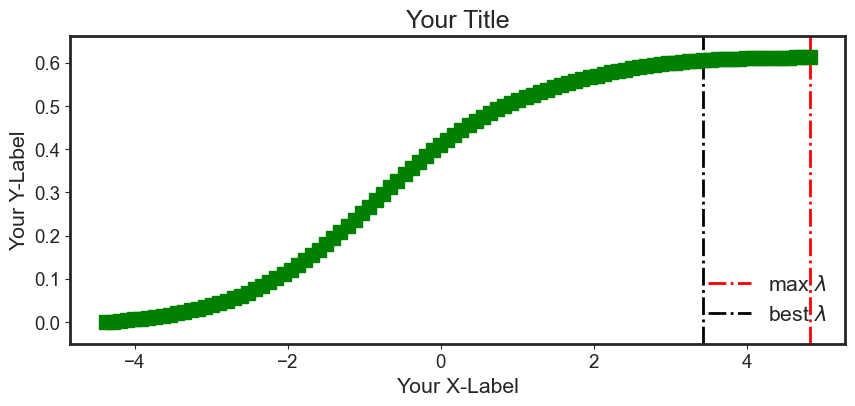

In [20]:
# plot cv_results -> try customizing it with your favorite style
reg.plot_cv_results(
    figsize=(10, 4),
    marker="s",
    markersize=10,
    color="green",
    maxlambdacolor="red",
    bestlambdacolor="black",
    linestyle="-.",
    fontsize=18,
    grid=False,
    legend=True,
    legendloc=4,
    xlabel="Your X-Label",
    ylabel="Your Y-Label",
    title="Your Title",
    save_path=None,
)

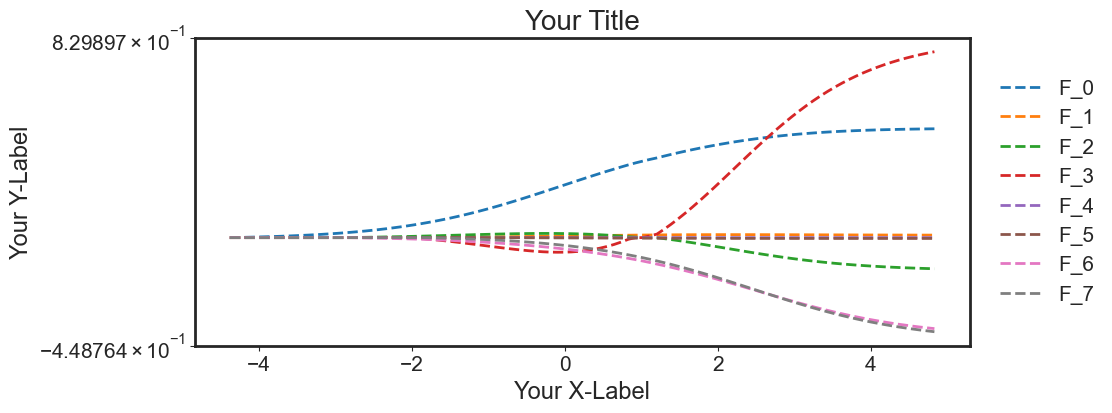

In [21]:
# plot coeff_paths --> try customizing it with your favorite style
reg.plot_coeff_path(
    figsize=(10, 4),
    linestyle="--",
    fontsize=20,
    grid=False,
    legend=True,
    legendloc="center",
    xlabel="Your X-Label",
    ylabel="Your Y-Label",
    title="Your Title",
    bbox_to_anchor=(1.1, 0.5),
    yscale="symlog",
    save_path=None,
)

## You can use the `RegressionMetrics` class to evaluate your model

In [22]:
from slickml.metrics import RegressionMetrics

metrics = RegressionMetrics(y_test, y_pred)

,R2 Score,Explained Variance Score,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Mean Absolute Percentage Error,REC AUC,Coeff. of Variation,Mean of Variation
Metrics,0.583000,0.583000,0.541000,0.554000,None,0.327000,0.796000,0.396000,1.157000


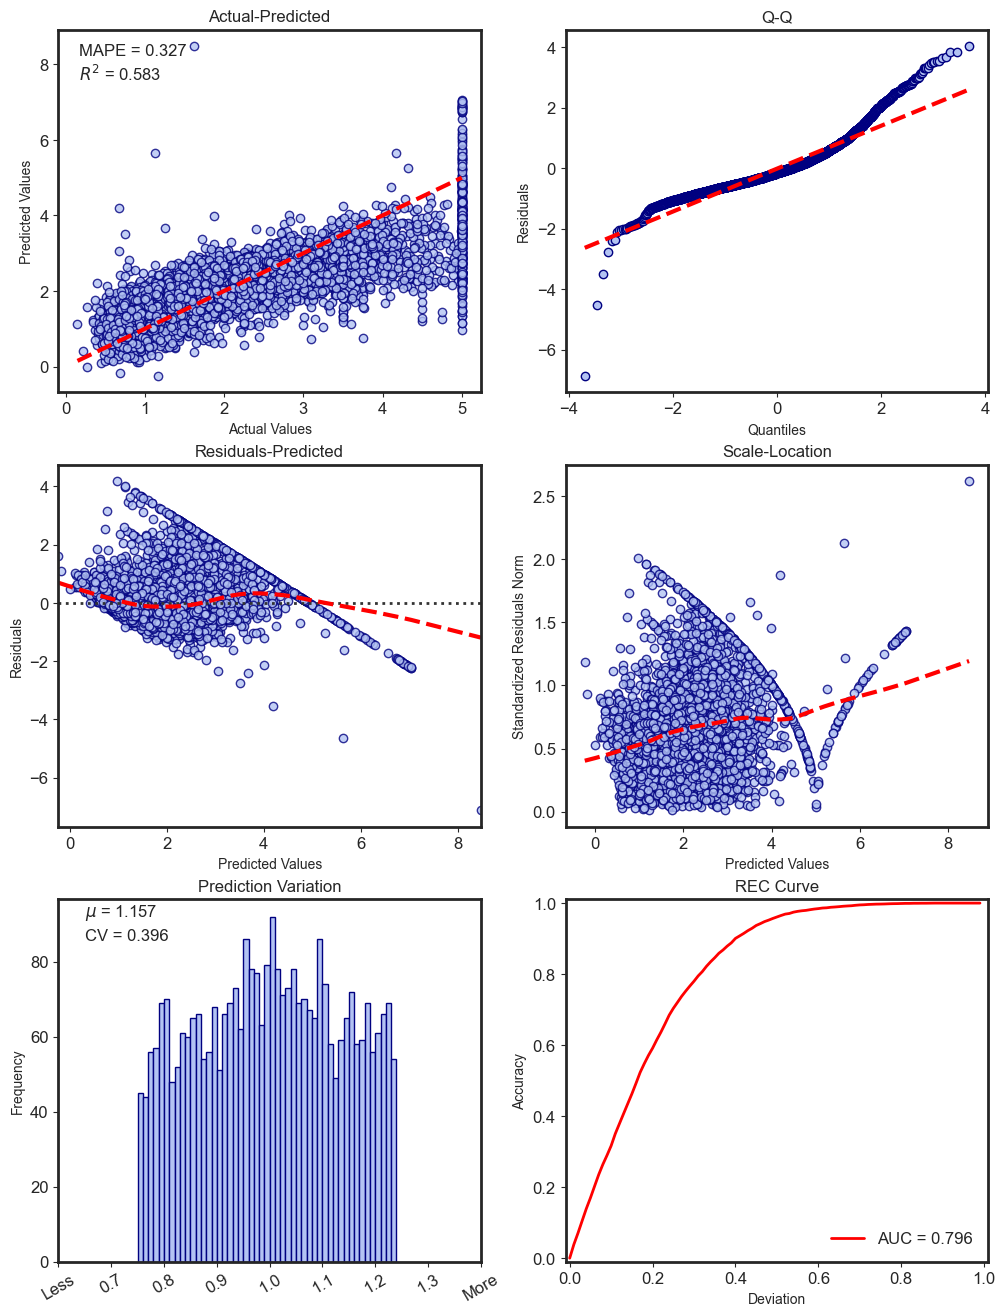

In [23]:
metrics.plot()